K-means: a simple algorithm for clustering (unsupervised machine learning)

You are given a training set {X(1),...,X(m)} and you want to group data into a few «different clusters». 
You have no labels associated with the training set (as you would with supervised learning), so you need a definition of «similar» and «different».
K-means is an iterative procedure that starts by guessing the initial centroids, then assigns each X(i) to its closest centroid, then updates the centroids based on the most recent assignments.
In the exercises below, the notion of similarity is defined by the euclidean distance.


First import the packages

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sb  
from scipy.io import loadmat  
%matplotlib inline



Step 1: assigning data to clusters defined by centroids

Assignment: for each data example X(i), find among the centroids $\{\mu_j\}$ the one that minimizes $$\mu_{\bar{j}} = \argmin_j |X(i)-\mu_j|^2$$
		the data example X(i) is assigned to the cluster $\bar{j}(i)$

Define function to find the closest centroids for each data example X(i)

In [104]:
def find_closest_centroids(X, centroids):  
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)

    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j

    return idx

Step 2: Define function to compute centroids

Centroid update: mean of the data examples assigned to the centroid
$$\mu_k=\frac{1}{\text{|# 𝑒𝑙𝑒𝑚𝑒𝑛𝑡𝑠 𝑎𝑠𝑠𝑖𝑔𝑛𝑒𝑑 𝑡𝑜 𝑐𝑒𝑛𝑡𝑟𝑜𝑖𝑑 𝑘|}} \sum_{\text{i assigned to centroid k}} X(i)$$ 

In [105]:
def compute_centroids(X, idx, k):  
    m, n = X.shape
    centroids = np.zeros((k, n))

    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()

    return centroids

Define function to run iterative algorithm

In [106]:
def run_k_means(X, initial_centroids, max_iters):  
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids

    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)

    return idx, centroids

Define function to visualize clusters

In [107]:
def plot_clusters(X, idx):
    cluster1 = X[np.where(idx == 0)[0],:]  
    cluster2 = X[np.where(idx == 1)[0],:]  
    cluster3 = X[np.where(idx == 2)[0],:]

    fig, ax = plt.subplots(figsize=(12,8))  
    ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')  
    ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')  
    ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')  
    ax.legend()
        
    return ax

Load example dataset

In [108]:
data = loadmat('/Users/g.pica/downloads/ex7data2.mat')  
X = data['X']  

visualize data (using matplotlib, the main library for quick plotting in Python, also resembles matlab)

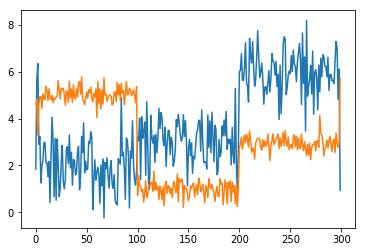

In [109]:
plt.plot(X)

Initialize centroids with no reference to data (should be done randomly, but we can see the main idea starting with fixed values)

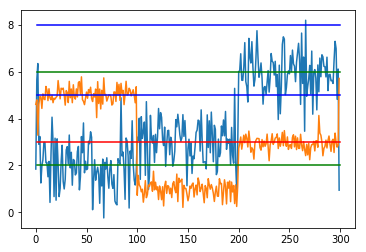

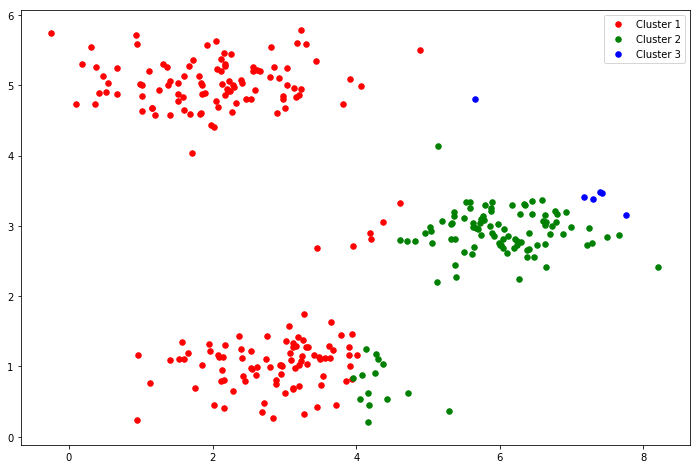

In [110]:
initial_centroids = initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx_first_iteration = find_closest_centroids(X, initial_centroids)
plt.figure(1)
plt.plot(X)
plt.plot([1, 300], initial_centroids[0, :], 'r')
plt.plot([1, 300], [initial_centroids[1, 0], initial_centroids[1, 0]], 'g')
plt.plot([1, 300], [initial_centroids[1, 1], initial_centroids[1, 1]], 'g')
plt.plot([1, 300], [initial_centroids[2, 0], initial_centroids[2, 0]], 'b')
plt.plot([1, 300], [initial_centroids[2, 1], initial_centroids[2, 1]], 'b')
plot_clusters(X, idx_first_iteration)

Visualize clusters defined with bad centroids above

Run the algorithm with the data uploaded above (10 iterations)

In [111]:
idx, centroids = run_k_means(X, initial_centroids, 10)  

Visualize final result

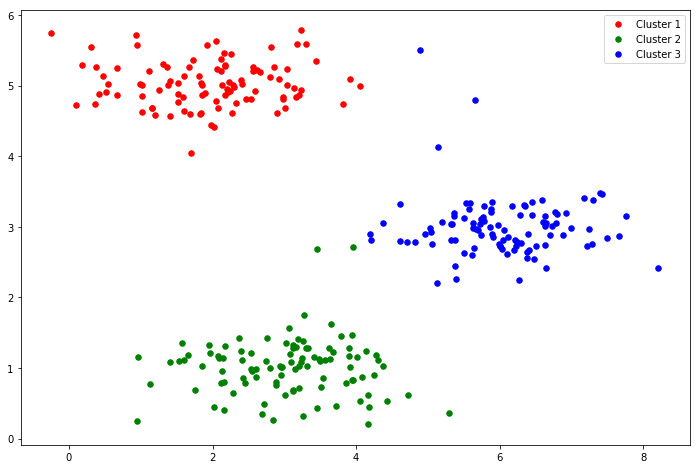

In [112]:
plot_clusters(X, idx)

Problems: how do we know if the clustering is correct? (a general issue with unsupervised learning)
In particular, a final solution of k-means is always achieved, however it depends on the initial setting of the centroids and can be non ideal.

A more interesting application: k-means for image compression.
Upload raw pixel data for image {128 pixel X 128 pixel X RGB values}. Each pixel is given a color, a 24 bit value, three X 8-bit unsigned integers (0 to 255) - a point in a 3D RGB space.

Aim: reducing the figure to 16 colors representation. Instead of all colors, find the "most representative" 16 colors that best summarize data.

Each pixel is a data example X(i), and we want to assign them to one of the 16 colors (the 16 clusters). 

In [113]:
image_data = loadmat('/Users/g.pica/downloads/bird_small.mat')  
A=image_data['A']

Pre-process data to feed it to k-means

In [114]:
# normalize value ranges
A = A / 255.

# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
np.shape(X)

(16384, 3)

Define function to randomly initialize centroids

In [115]:
def init_centroids(X, k):  
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)

    for i in range(k):
        centroids[i,:] = X[idx[i],:]

    return centroids

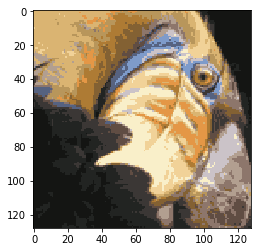

In [120]:
# randomly initialize the centroids - note, here we set the number of centroids too
n_representative_colors=16
initial_centroids = init_centroids(X, n_representative_colors)

# run the algorithm
n_iterations = 10
idx, centroids = run_k_means(X, initial_centroids, n_iterations)

# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

# map each pixel to the centroid value - that is, to the color value among the 
# 16 most representative found by the algorithm
X_recovered = centroids[idx.astype(int),:]

# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))

plt.imshow(X_recovered)  

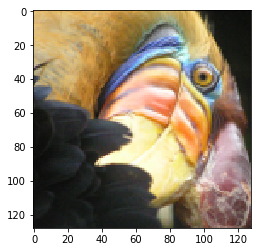

In [118]:
plt.imshow(A)

Original image was specified as a 24 bits value (a color) for each of the 128 X 128 pixels = 400 kB
The compressed image is specified by 4 bits per pixel (one of the 16 colors) + small overhead to store the 24 bits RGB representations of the 16 colors (16 X 24 bits) = 67 kB (factor 6 less than original).

Material and links:
    
    http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-7/
    https://github.com/jdwittenauer/ipython-notebooks/blob/master/exercises/ML/ex7.pdf
    http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/
    https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook
    https://github.com/jdwittenauer/ipython-notebooks/blob/master/exercises/ML/ex7.pdf

In [121]:
idx

array([ 13.,  13.,  13., ...,   6.,   9.,   9.])

In [122]:
np.shape(idx)

(16384,)